In [1]:
import pandas as pd
df = pd.read_csv("movies.csv")

In [2]:
# df["Title Type"].unique()

In [3]:
#df.isna().sum()

In [4]:
df = df.drop(columns=["Description", "Your Rating", "Date Rated"])

In [5]:
#df.isna().sum()

In [6]:
df = df.dropna()

In [22]:
df.head()
#df.to_html('cleaned_movies.html')

In [8]:
val = df["Directors"].value_counts()
new_df = pd.DataFrame(val)
new_df.reset_index(level=0, inplace=True)


In [20]:
new_df

,index,Directors
0,Steven Spielberg,28
1,Sam Liu,14
2,Steven Soderbergh,13
3,Ridley Scott,13
4,Michael Bay,13
...,...,...
1411,Anton Corbijn,1
1412,"Rich Moore, Jared Bush, Byron Howard",1
1413,"Dilip Mestry, Mansoor Khan",1
1414,Michael Tiddes,1


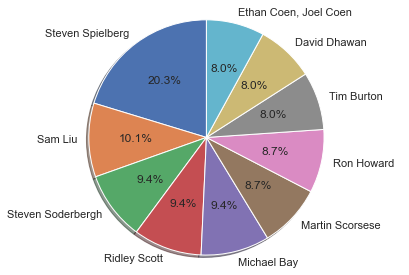

In [50]:
import matplotlib.pyplot as plt
labels = list(new_df["index"])
sizes = list(new_df["Directors"])
fig1, ax1 = plt.subplots()
ax1.pie(sizes[:10], labels=labels[:10], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.savefig('../Visualizations/directorspie.png')
plt.show()

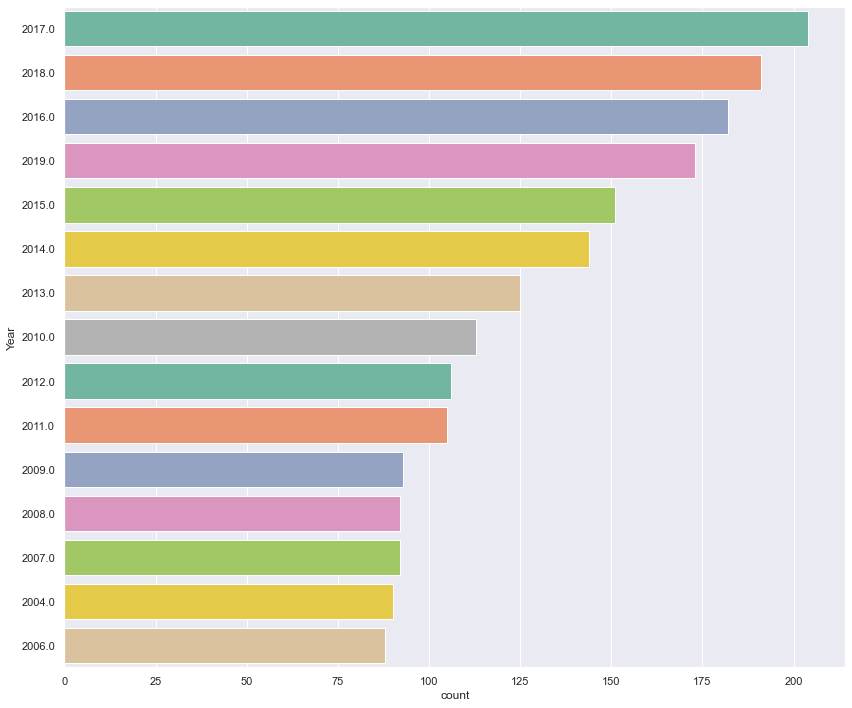

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Year", data=df, palette="Set2", order=df['Year'].value_counts().index[0:15])
plt.tight_layout()
plt.savefig('../Visualizations/years.png')

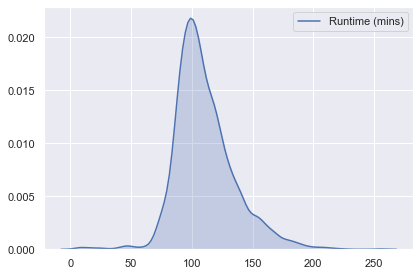

In [16]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['Runtime (mins)'], shade=True)
plt.tight_layout()
plt.savefig('../Visualizations/runtime.png')

In [13]:
g = {}
for index,row in df.iterrows():
    for i in row["Genres"].split(","):
        if i in g.keys():
            g[i] += 1
        else:
            g[i] = 1


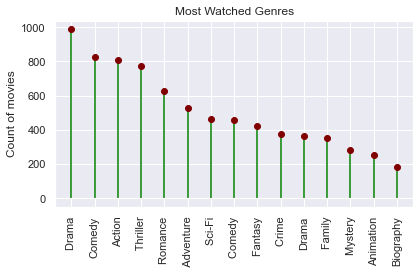

In [18]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

#fig = plt.figure(figsize = (10, 25))
x=list(g.keys())
y=list(g.values())
ax.vlines(x[:15], ymin=0, ymax=y[:15], color='green')
ax.plot(x[:15],y[:15], "o", color='maroon')
ax.set_xticklabels(x[:15], rotation = 90)
ax.set_ylabel("Count of movies")
ax.set_title("Most Watched Genres")
plt.tight_layout()
plt.savefig('../Visualizations/genres.png')